In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from knn import my_knn
# Manually defined column names
column_names = [
    'Class',
    'Alcohol',
    'Malic_acid',
    'Ash',
    'Alcalinity_of_ash',
    'Magnesium',
    'Total_phenols',
    'Flavanoids',
    'Nonflavanoid_phenols',
    'Proanthocyanins',
    'Color_intensity',
    'Hue',
    'OD280/OD315_of_diluted_wines',
    'Proline'
]
# import wine dataset
wine = pd.read_csv('C:/Users/akana/Masaüstü/wine.data', names=column_names)
y = wine.iloc[:, 0]
x = wine.iloc[:, 1:]
print(x)
print(y)


     Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyan

In [25]:
# Split the data as training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)
scaler = StandardScaler()  # StandardScaler for standardization this gives better accuracy because the mean is 0 and variance is 1
normalized_x_train = scaler.fit_transform(x_train)
normalized_x_test = scaler.transform(x_test)
print(normalized_x_train)

[[ 0.87668336  0.79842885  0.64412971 ...  0.0290166  -1.06412236
  -0.2059076 ]
 [-0.36659076 -0.7581304  -0.39779858 ...  0.0290166  -0.73083231
  -0.81704676]
 [-1.69689407 -0.34424759 -0.32337513 ...  0.90197362  0.51900537
  -1.31256499]
 ...
 [-0.70227477 -0.68615078 -0.65828065 ...  0.46549511  0.51900537
  -1.31256499]
 [ 1.13777093 -0.62316862 -0.91876272 ... -0.18922266  1.03282752
   0.80164614]
 [ 1.4610222   0.12361993  0.42085937 ... -1.45501034 -1.2168803
  -0.2719767 ]]


In [26]:
k=3
y_knn=my_knn(normalized_x_train,normalized_x_test,y_train,k)
print(y_knn)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)
print(f'The accuracy of my implementation of knn is {accuracy_score(y_test, y_knn)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

[1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1]
[1 3 2 1 1 2 1 3 2 2 3 3 1 2 3 2 1 1 3 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]
The accuracy of my implementation of knn is 0.9722222222222222
The accuracy of sklearn implementation is 0.9444444444444444


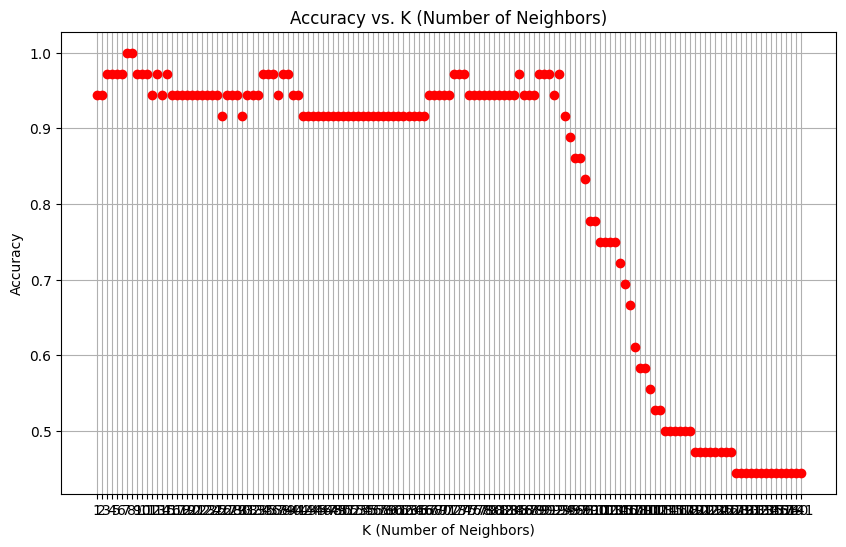

In [27]:
#accuracy vs k
accuracies = []
k_range = range(1, 142)  # k up to 142 to see the k effect

for k in k_range:
    y_knn=my_knn(normalized_x_train, normalized_x_test,y_train,k)
    accuracy = accuracy_score(y_test, y_knn)
    accuracies.append(accuracy)

# Plotting accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='', color='r')
plt.title('Accuracy vs. K (Number of Neighbors)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [28]:
#Evaluate the KNN model with sklearn for comparison
k_best = 3  # We can choose k=3 based on accuracy
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn = knn.predict(normalized_x_test)

In [29]:
# Confusion Matrix for custom KNN
conf_matrix_custom = confusion_matrix(y_test, y_knn)
print("\nConfusion Matrix for my KNN:")
print(conf_matrix_custom)
# Confusion Matrix for sklearn KNN
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
print("\nConfusion Matrix for Sklearn KNN:")
print(conf_matrix_sklearn)


Confusion Matrix for my KNN:
[[ 0 14  0]
 [ 0 16  0]
 [ 0  6  0]]

Confusion Matrix for Sklearn KNN:
[[14  0  0]
 [ 1 14  1]
 [ 0  0  6]]


In [35]:
# Classification Report for custom KNN
class_report_custom = classification_report(y_test, y_knn,zero_division=0)
print("\nClassification Report for my KNN:")
print(class_report_custom)

# Classification Report for sklearn KNN
class_report_sklearn = classification_report(y_test, y_pred_sklearn,zero_division=0)
print("\nClassification Report for Sklearn KNN:")
print(class_report_sklearn)


Classification Report for my KNN:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.44      1.00      0.62        16
           3       0.00      0.00      0.00         6

    accuracy                           0.44        36
   macro avg       0.15      0.33      0.21        36
weighted avg       0.20      0.44      0.27        36


Classification Report for Sklearn KNN:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93        16
           3       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36

